In [1]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können","bzw", "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl", "fil" "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
877


In [8]:
import pandas as pd
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv") # first 19 documents with their ground truth

In [9]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","wissenschaftssystem, betreuung, wissenschaft..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","integration, geflüchtete, studienkolleg, mi..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","beruflicher verbleib von exmatrikulierten, st..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","evaluation, qualifikation, effizienz, studi..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",hochschulforschung
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","promotion, hochschulforschung"
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","studienberechtigte, hochschulforschung"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",hochschulforschung
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","promotion, hochschulforschung"
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",hochschulforschung


In [26]:
test = data['final_cleaned_text'][0]

In [27]:
test

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [32]:
import pke


# define the set of valid Part-of-Speeches
pos = {'NOUN',  'ADJ'}

# 1. create a TextRank extractor.
extractor = pke.unsupervised.TextRank()

# 2. load the content of the document.
extractor.load_document(input=test,
                        language='de',
                        normalization=None)

# 3. build the graph representation of the document and rank the words.
#    Keyphrase candidates are composed from the 33-percent
#    highest-ranked words.
extractor.candidate_weighting(window=3,
                              pos=pos,
                              top_percent=0.33)

# 4. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=500)

print(keyphrases)


[('promotion arbeiten', 0.02081518871556087), ('ausbildung promotion', 0.020232049544886666), ('gesamten promotion', 0.0197353854477826), ('promotion teil', 0.019715383249908174), ('promotion', 0.01814380929001882), ('anderen wissenschaftlichen', 0.01201124987185576), ('sonstigen beruflichen abschluss', 0.01060207987030646), ('thema gute wissenschaftliche praxis', 0.00986861031989747), ('folgenden genannten tätigkeiten', 0.009847690888135564), ('fragen guter wissenschaftlicher praxis', 0.009497845792307934), ('wissenschaftlichen kontakte', 0.009347878509595266), ('beruflichen tätigkeit', 0.008822572521075695), ('sonstigen wissenschaftlichen', 0.008797000954305169), ('bereich weiterer mündlicher kommunikationskompetenzen', 0.008503447405879121), ('berufliche tätigkeit', 0.008286255569437231), ('wissenschaftlichen schreiben', 0.008204475185763538), ('anderen fakultät', 0.008178069394091854), ('wissenschaftlichen karriere', 0.008104973439195154), ('anderen wissenschaftler', 0.008095528786

In [2]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion'],
 [''],
 [''],
 ['promotion'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['promotion'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [3]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['promotion'],
 [''],
 [''],
 ['promotion'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['promotion'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['promotion'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [13]:
only_keywords = []
for i in range(len(GT_within_text)):
    only_keywords.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            only_keywords[i].append(GT_within_text[i][j])

In [14]:
only_keywords[0]

['wissenschaftssystem',
 'betreuung',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [15]:
text = 'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule gemeldete Unterbrechung. Ja. Nein. Können Sie sich noch erinnern in welchem Quartal Sie mit den Arbeiten begonnen haben. Können Sie sich noch erinnern in welchem Quartal Sie zugelassen wurden. Quartal. Quartal. Quartal. Quartal. Ist Ihre Hochschule darüber informiert dass Sie Ihre Promotion abgebrochen haben. Ja. Nein. Können Sie sich noch erinnern in welchem Quartal Sie Ihre Promotion abgebrochen haben. Quartal. Quartal. Quartal. Quartal. Ist an Ihrem Promotionsverfahren eine Hochschule im Ausland beteiligt. Ja. Nein. Handelt es sich dabei um einen gemeinsamen Abschluss der Hochschulen aus dem In und Ausland cotutelle de thèse. Ja. Nein. Ist an ihrem Promotionsverfahren eine Fachhochschule bzw. Hochschule für angewandte Wissenschaften beteiligt. Waren Sie in den letzten Jahren an der Universität des Saarlandes UdS als wissenschaftliche Beschäftigte tätig. Ja. Nein. Wie attraktiv bewerten Sie die Universität des Saarlandes als Arbeitgeberin. sehr unattraktiv. sehr attraktiv. Wurden aus Ihrer Sicht an der Universität des Saarlandes in den letzten Jahren Einsparungen vorgenommen die zu Veränderungen führten. Ja. Nein. Kann ich nicht beurteilen. Wie bewerten Sie diese Veränderungen. sehr negativ. sehr positiv. Wurden aus Ihrer Sicht an der Universität des Saarlandes in den letzten Jahren Strukturentscheidungen getroffen die zu Veränderungen führten. Ja. Nein. Kann ich nicht beurteilen. Wie bewerten Sie diese Strukturentscheidungen. sehr negativ. sehr positiv. Führten in Ihrem Bereich in Ihrem Fach Strukturentscheidungen zu Veränderungen. Ja. Nein. Kann ich nicht beurteilen. Wie bewerten Sie diese Veränderungen. sehr negativ. sehr positiv. Ist Ihre Promotion Teil eines Forschungsprojekts an dem auch noch andere Personen arbeiten. Gibt es in dem Forschungsprojekt außer Ihnen selbst noch andere Promovierende. Haben Sie schon ein konkretes Promotionsthema. Sind Sie derzeit Mitglied einer Graduiertenakademie der HHU Düsseldorf. Sind Sie derzeit Mitglied in einem strukturierten Promotionsprogramm. Promotionsstudiengang Promotionsprogramm Graduiertenschule Graduiertenkolleg. Alles in allem wie zufrieden sind Sie mit dem Kurs und Lehrveranstaltungsangebot für Promovierende an Ihrer Hochschule. überhaupt nicht zufrieden. völlig zufrieden. Entstand der Kontakt zu dem zu den externen Kooperationspartner bereits vor dem Beginn Ihrer Promotion. Ja. Nein. Trägt Ihre Promotion dazu bei eine für diese Organisation relevante Fragestellung zu beantworten. Ja. Nein. In welcher Form planen Sie Ihre Dissertation zu publizieren. Kam Kommt es vor dass Sie ernsthaft über einen Abbruch Ihrer Promotion nachdachten nachdenken. niemals. selten. gelegentlich. oft. ständig. Haben Sie eine Promotions bzw. Betreuungsvereinbarung getroffen. Ja. Nein. An welcher Hochschule Einrichtung sind Ihre Betreuer innen überwiegend tätig. Welchen formalen Betreuungsstatus haben Ihre Betreuer innen. Welche Positionen haben Ihre Betreuer innen. Wer ist Ihr Hauptbetreuer in. Betreuer in und Ihr und Ihr und Ihr Ist Ihre Stelle . Ist Ihre Stelle . Vollzeit. Teilzeit mit. Schließt diese Folge von Verträgen auch Phasen der Arbeitslosigkeit mit ein. Ja. Nein. Ist in Ihrem Arbeitsvertrag oder in Nebenabsprachen ein Qualifizierungsziel festgelegt worden. Ja. Nein. Welches Qualifizierungsziel ist in Ihrem Arbeitsvertrag oder in Nebenabsprachen festgelegt worden. Promotion. Ein anderes Qualifizierungsziel und zwar. Steht Ihnen ein arbeitsvertraglich festgelegter Anteil Ihrer Arbeitszeit für die Arbeit an Ihrer Promotion zur Verfügung. Ja und zwar. Nein kein vertraglich festgelegter Anteil. Wie schätzen Sie den thematischen Bezug Ihrer Beschäftigung zu Ihrem Promotionsprojekt ein. kein Bezug. sehr starker Bezug. Im Folgenden geht es um Ihre sonstige Beschäftigung. Referendariat Volontariat Traineeship. Ist Ihre Stelle . Ist Ihre Stelle . Vollzeit. Teilzeit mit. Schließt diese Folge von Verträgen auch Phasen der Arbeitslosigkeit mit ein. Ja. Nein. Ist in Ihrem Arbeitsvertrag oder in Nebenabsprachen ein Qualifizierungsziel festgelegt worden. Ja. Nein. Welches Qualifizierungsziel ist in Ihrem Arbeitsvertrag oder in Nebenabsprachen festgelegt worden. Promotion. Ein anderes Qualifizierungsziel und zwar. Steht Ihnen ein arbeitsvertraglich festgelegter Anteil Ihrer Arbeitszeit für die Arbeit an Ihrer Promotion zur Verfügung. Ja und zwar. Nein kein vertraglich festgelegter Anteil. Wie schätzen Sie den thematischen Bezug Ihrer Beschäftigung zu Ihrem Promotionsprojekt ein. kein Bezug. sehr starker Bezug. Im Folgenden geht es um ihre Selbstständigkeit bzw. freiberufliche Tätigkeit mit Forschungs oder Entwicklungsbezug. Wie schätzen Sie den thematischen Bezug Ihrer Erwerbstätigkeit zu Ihrem Promotionsprojekt ein. Im Folgenden geht es um ihre Selbstständigkeit bzw. freiberufliche Tätigkeit ohne Forschungs oder Entwicklungsbezug. Wie schätzen Sie den thematischen Bezug Ihrer Erwerbstätigkeit zu Ihrem Promotionsprojekt ein. Haben Sie in den letzten zwölf Monaten in einem Forschungs oder Publikationsprojekt mit anderen Wissenschaftler inne zusammengearbeitet. Ja. Nein. Sind Sie vertraglich zur Lehre verpflichtet. Ja und zwar mit. Nein. Waren Sie seit Beginn Ihrer Promotion schon einmal promotionsbedingt oder zu anderen wissenschaftlichen Zwecken im Ausland. Ja. Nein. Wie zufrieden sind Sie gegenwärtig alles in allem mit Ihrem Leben. überhaupt nicht zufrieden. völlig zufrieden. Haben Sie derzeit eine feste Partner in. Ja. Nein. Leben Sie mit Ihrer Ihrem Partner in zusammen. Ja. Nein. Welche berufliche Qualifikation hat Ihr Partner in. Keine abgeschlossene Berufsausbildung. Abgeschlossene Berufsausbildung. Hochschulabschluss. Hochschulabschluss und Promotion. Ist Ihr Partner in derzeit . in Vollzeit erwerbstätig. in Teilzeit erwerbstätig. in Ausbildung Umschulung. in Elternzeit Mutterschutz beurlaubt. nicht erwerbstätig einschließlich Stipendiat inn en und Studierende ohne Erwerbseinkommen. in sonstiger Weise tätig Und zwar. Ist Ihr Partner in als Wissenschaftler in tätig. Ja. Nein. Haben Sie Kinder. Ja und zwar. Nein. Möchten Sie in der Zukunft Kinder haben. Ja in der nächsten Zeit. Ja später einmal. Nein sicher nicht. Das kann ich zurzeit nicht sagen. Wünschen Sie sich weitere Kinder. Ja in der nächsten Zeit. Ja später einmal. Nein sicher nicht. Das kann ich zurzeit nicht sagen. Wie zufrieden sind Sie mit Ihrer derzeitigen Vereinbarkeit von Arbeits und Privatleben. überhaupt nicht zufrieden. völlig zufrieden. Haben Sie schon einmal einen Kinderwunsch aus beruflichen Gründen zurückgestellt. Ja. Nein. Wie würden Sie Ihren Gesundheitszustand im Allgemeinen beschreiben. sehr gut. gut. mittelmäßig. schlecht. sehr schlecht. Wir möchten Ihnen gerne Fragen zur Gesundheit und möglichen Beeinträchtigungen stellen. Diese Informationen liefern wichtige Anhaltspunkte zur Verbreitung gesundheitlicher Beeinträchtigungen bei Promovierenden und tragen dazu bei die Promotionsbedingungen für Personen mit gesundheitlichen Beeinträchtigungen zu verbessern. Ja ich möchte die Fragen zu den Themen Gesundheit und Beeinträchtigung beantworten. Nein ich möchte die Fragen zu den Themen Gesundheit und Beeinträchtigung nicht beantworten. Haben Sie eine amtlich anerkannte Behinderung. Ja. Nein. Kennen Sie Programme für Menschen mit Behinderung an Ihrer Hochschule. Ja. Nein. Haben Sie an solchen Programmen teilgenommen. Ja. Nein. Wie schätzen Sie sich persönlich ein Wie risikobereit sind Sie im Allgemeinen. gar nicht risikobereit. sehr risikobereit. Möchten Sie nach der Promotion im Wissenschaftsbereich bleiben. Ja ich möchte zunächst in der Wissenschaft bleiben. Nein ich möchte zunächst den Wissenschaftsbereich verlassen. Ich bin noch unentschlossen. Sind Sie derzeit erwerbstätig. Ja. Nein. Können Sie sich vorstellen später noch einmal in die Wissenschaft zurückzukehren. Ja. Nein. Ich möchte mir das offen halten. Weiß ich noch nicht. In welchem Sektor sind Sie vorrangig tätig. Hochschulen. öffentlich geförderte außeruniversitäre Forschungseinrichtungen. Sonstiger öffentlicher Dienst. Privatwirtschaft Industrie. Privater Non Profit Sektor. Sonstiges und zwar. In welchem Sektor beabsichtigen Sie zukünftig vorrangig tätig zu sein. Hochschulen. Öffentlich geförderte außeruniversitäre Forschungseinrichtungen. Sonstiger öffentlicher Dienst. Privatwirtschaft Industrie. Privater Non Profit Sektor. Sonstiges und zwar. Ich bin noch unentschlossen. Ich habe nicht vor eine Erwerbstätigkeit aufzunehmen. Streben Sie eine Professur an. Ja. Nein. Weiß ich noch nicht. Welche Professur bevorzugen Sie. Universitätsprofessur. Fachhochschulprofessur. Da bin ich mir noch unsicher. Wie sehr wünschen Sie sich dennoch dauerhaft in der Wissenschaft tätig zu sein. gar nicht. sehr stark. Welches Geschlecht haben Sie. Weiblich. Männlich. Divers. Wo wurden Sie geboren. In Deutschland. In einem anderen Land und zwar. Wo lebten Sie am. Juni. In der BRD. In der DDR. In einem anderen Land und zwar. Seit wann besitzen Sie die deutsche Staatsangehörigkeit. seit Geburt. seit dem Jahr. Wo wurden Ihre Eltern geboren. In Deutschland. In einem anderen Land und zwar. Weiß ich nicht Vater unbekannt. Wo lebten Ihre Eltern am. Juni. Wo lebte Ihre Mutter am. Juni. In der BRD. In der DDR. In einem anderen Land und zwar. Welchen höchsten Schulabschluss haben Ihre Eltern. Welchen höchsten Schulabschluss hat Ihre Mutter. Allgemeine Hochschulreife Abitur. Fachgebundene Hochschulreife. Fachhochschulreife. Realschulabschluss Mittlere Reife Polytechnische Oberschule der DDR mit Abschluss der. Klasse. Hauptschulabschluss Polytechnische Oberschule der DDR mit Abschluss der. oder. Klasse. Kein Abschluss unter. Klasse. Schulabschluss unbekannt. Einen anderen Schulabschluss und zwar. Welchen höchsten Ausbildungsabschluss haben Ihre Eltern. Welchen höchsten Ausbildungsabschluss hat Ihre Mutter. Promotion Doktortitel. Universitätsabschluss. Fachhochschulabschluss. Abschluss an einer Fachschule nur DDR. Abschluss an einer Meister Techniker Fachschule Berufs oder Fachakademie. Beruflich betriebliche Berufsausbildung Lehre. Beruflich schulische Ausbildung Berufsfachschule Handelsschule. Sonstigen beruflichen Abschluss. Keinen beruflichen Abschluss. Beruflicher Abschluss unbekannt. Welche berufliche Stellung nehmen Ihre Eltern ein. Welche berufliche Stellung nimmt Ihre Mutter ein. Selbstständige mit Angestellten. Selbstständige ohne Angestellte. Angestellte. Beamtin. Arbeiterin. Nie erwerbstätig gewesen. Berufliche Stellung unbekannt. Kann ich nicht einordnen. Unterhalten Sie sich mit Ihren Eltern über Inhalte Ihrer Promotion. Wo haben Sie Ihre Studienberechtigung erworben. In Deutschland. In einem anderen Land und zwar. In welchem Bundesland haben Sie Ihre Hochschulzugangsberechtigung erworben. Bitte auswählen. Baden Württemberg. Bayern. Berlin. Brandenburg. Bremen. Hamburg. Hessen. Mecklenburg Vorpommern. Niedersachsen. Nordrhein Westfalen. Rheinland Pfalz. Saarland. Sachsen. Sachsen Anhalt. Schleswig Holstein. Thüringen. Art des Abschlusses. Bachelor. Master. Staatsexamen. Diplom. Magister. Sonstiges und zwar. Fühlen Sie sich ausreichend über das deutsche Wissenschaftssystem informiert. Ja. Nein. Hätten Sie sich im Vorfeld Ihrer Promotion mehr Informationen zum Thema Promovieren wie beispielsweise eine Informationsveranstaltung gewünscht. Ja und zwar. Nein. Wie reagiert Ihr Haupt Betreuer in auf Ihren Wunsch der Teilnahme an einem überfachlichen Weiterbildungsangebot. der PoGS. wird verweigert. wird toleriert. wird unterstützt. trifft nicht zu. Haben Sie bereits an Vernetzungsveranstaltungen der PoGS. PhDay Career Talk etc. teilgenommen. Warum haben Sie sich für eine Promotion an dieser Hochschule entschieden. Weil ich gerne an diesem Standort sein wollte. Wegen der guten Forschungsbedingungen in meinem Fach. Wegen des Betreuers der Betreuerin. Wegen des guten Rufs der Hochschule. Weil es dort attraktive Serviceangebote für Promovierende gibt. Es hat sich einfach so ergeben. Sonstiges und zwar. Welche Aussagen treffen auf Ihr Promotionsverfahren zu. Ich habe hatte einen Arbeitsvertrag an der Fachhochschule Hochschule für angewandte Wissenschaften. Wesentliche Teile der Arbeit finden an der Fachhochschule Hochschule für angewandte Wissenschaften statt. Der Die FH Professor in ist Prüfer in. Der Die FH Professor in ist Gutachter in. Der Die FH Professor in ist Betreuer in. Es gibt einen Kooperationsvertrag zwischen der Universität und der FH. Ich habe eine Betreuungsvereinbarung die sowohl der die Universitäts als auch der die FH Professor in unterschrieben hat. Keine der genannten Aussagen trifft auf mein Promotionsverfahren zu. Wie sind Sie zu Ihrem Promotionsthema gekommen. Das Thema baute auf Arbeiten meines vorangegangenen Studiums auf. Das Thema baut auf Arbeiten meines vorangegangenen Studiums auf. Das Thema wurde mir von einer einem Betreuer in vorgeschlagen. Das Thema schließt an Berufserfahrungen an die ich außerhalb der Wissenschaft gemacht habe. Das Thema schloss an Berufserfahrungen an die ich außerhalb der Wissenschaft gemacht habe. Das Thema wurde in enger Kooperation mit Partnern außerhalb der Wissenschaft abgestimmt. Ich habe das Thema selbst entwickelt. Das Thema war vorgegeben. im Rahmen eines Forschungsprojekts. Der thematische Rahmen war vorgegeben. Das Thema wurde ausgeschrieben. Sonstiges und zwar. Das Thema baute auf Arbeiten meines vorangegangenen Studiums auf. Das Thema baut auf Arbeiten meines vorangegangenen Studiums auf. Das Thema wurde mir von einer einem Betreuer in vorgeschlagen. Das Thema schließt an Berufserfahrungen an die ich außerhalb der Wissenschaft gemacht habe. Das Thema schloss an Berufserfahrungen an die ich außerhalb der Wissenschaft gemacht habe. Das Thema wurde in enger Kooperation mit Partnern außerhalb der Wissenschaft abgestimmt. Ich habe das Thema selbst entwickelt. Das Thema war vorgegeben. im Rahmen eines Forschungsprojekts. Der thematische Rahmen war vorgegeben. Das Thema wurde ausgeschrieben. Sonstiges und zwar. Wie waren Sie zu Ihrem Promotionsthema gekommen. Ich muss an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich werde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der drei Aussagen trifft zu. Ich muss an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich werde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der drei Aussagen trifft zu. Was trifft für Ihre Mitgliedschaft in der Graduiertenakademie iGRAD zu. Ich musste an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich wurde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der drei Aussagen traf zu. Ich musste an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich wurde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der drei Aussagen traf zu. Was trifft für Ihre Mitgliedschaft in der Graduiertenakademie philGRAD zu. Ja ein Stipendium. Ja eine Stelle. Nein. Was traf für Ihre Mitgliedschaft in der Graduiertenakademie iGRAD zu. Graduiertenkolleg DFG. Integriertes Graduiertenkolleg innerhalb eines SFB. Graduiertenschule der Exzellenzinitiative DFG. Promotionsprogramm der Universität ohne Förderung durch die DFG. Promotionsprogramm der Universität mit Förderung durch die DFG. International Max Planck Research School IMPRS. Programm der Helmholtz Gemeinschaft. Leibniz Graduate School. Promotionsstudiengang. Sonstiges Programm und zwar. Graduiertenkolleg DFG. Integriertes Graduiertenkolleg innerhalb eines SFB. Graduiertenschule der Exzellenzinitiative DFG. Promotionsprogramm der Universität ohne Förderung durch die DFG. Promotionsprogramm der Universität mit Förderung durch die DFG. International Max Planck Research School IMPRS. Programm der Helmholtz Gemeinschaft. Leibniz Graduate School. Promotionsstudiengang. Sonstiges Programm und zwar. Was traf für Ihre Mitgliedschaft in der Graduiertenakademie philGRAD zu. Ich muss an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich werde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der Aussagen trifft auf meine Mitgliedschaft in dem den Promotionsprogramm en zu. Bekamen Sie im Rahmen der Graduiertenakademie philGRAD ein Stipendium oder eine Stelle. Ich musste an einem verbindlichen Kurs und Lehrveranstaltungsprogramm teilnehmen. Ich wurde von mehreren Hochschullehrer inne betreut. Ich habe ein wettbewerbliches Auswahlverfahren mit Ausschreibung durchlaufen. Keine der Aussagen trifft auf meine ehemalige Mitgliedschaft in dem den Promotionsprogramm en zu. In welcher Art von Promotionsprogramm en sind Sie Mitglied. Ja ein Stipendium. Ja eine Stelle. Nein. In welcher Art von Promotionsprogramm en waren Sie Mitglied. zur Konferenz und Tagungsorganisation. im Bereich Personal und Mitarbeiterführung. zu speziellen Themen meines Promotionsfachs. zur Karriereplanung. zum Verfassen englischer Texte. Scientific Writing Skills in English. zu den Regeln guter wissenschaftlicher Praxis. im Bereich Wissenschaftskommunikation. zum Management von Forschungs Drittmittelprojekten. zu Moderationstechniken und Gremienleitung. zur Präsentation von Forschungsergebnissen. zu spezifischen Forschungsmethoden für mein Promotionsfach. zum wissenschaftlichen Schreiben Schreibwerkstätten etc . zur Entwicklung und Beantragung eines Forschungs Drittmittelprojekts. im Bereich Zeit Selbstmanagement. im Bereich Projektmanagement. zum Arbeiten in Teams. zu Lehr Lernkompetenzen Hochschuldidaktik. im Bereich weiterer mündlicher Kommunikationskompetenzen. Rhetorik Verhandeln Argumentation Small Talk. zu Informations Wissenskompetenzen bzw. Recherche. zu Statistik. zum Forschungs Datenmanagement. zum Umgang mit Konflikten. zu gewerblichem Rechtsschutz. Patent Urheberrecht. zu Networking bzw. Selbstmarketing. Selma Meyer Mentoring Programme für Promovierende. Sonstiges und zwar. Keine der genannten Kurse oder Lehrveranstaltungen sind mir bekannt. Was trifft für Ihre Mitgliedschaft in dem den Promotionsprogramm en zu. zur Konferenz und Tagungsorganisation. im Bereich Personal und Mitarbeiterführung. zu speziellen Themen meines Promotionsfachs. zur Karriereplanung. zum Verfassen englischer Texte. Scientific Writing Skills in English. zu den Regeln guter wissenschaftlicher Praxis. im Bereich Wissenschaftskommunikation. zum Management von Forschungs Drittmittelprojekten. zu Moderationstechniken und Gremienleitung. zur Präsentation von Forschungsergebnissen. zu spezifischen Forschungsmethoden für mein Promotionsfach. zum wissenschaftlichen Schreiben Schreibwerkstätten etc . zur Entwicklung und Beantragung eines Forschungs Drittmittelprojekts. im Bereich Zeit Selbstmanagement. im Bereich Projektmanagement. zum Arbeiten in Teams. zu Lehr Lernkompetenzen Hochschuldidaktik. im Bereich weiterer mündlicher Kommunikationskompetenzen. Rhetorik Verhandeln Argumentation Small Talk. zu Informations Wissenskompetenzen bzw. Recherche. zu Statistik. zum Forschungs Datenmanagement. zum Umgang mit Konflikten. zu gewerblichem Rechtsschutz. Patent Urheberrecht. zu Networking bzw. Selbstmarketing. Selma Meyer Mentoring Programme für Promovierende. Sonstiges. akademischen Karriereentwicklung. Beratung Coaching zur außerakademischen Karriereentwicklung. Schreibberatung coaching. Beratung zu Drittmittelanträgen. Beratung für internationale Promovierende. Beratung zur Vereinbarkeit von Beruf und Familie. Beratung Coaching zur individuellen Karriereentwicklung. Beratung zu Selbstständigkeit bzw. Firmengründung. Sonstiges und zwar. Bekamen Sie im Rahmen des Programms der Programme ein Stipendium oder eine Stelle. Beratung Coaching zu allgemeinen Fragen rund um die Promotion. Beratung Coaching zu Konflikten im Promotionskontext. Beratung zu Fragen guter wissenschaftlicher Praxis. Beratung Coaching zur akademischen Karriereentwicklung. Beratung Coaching zur außerakademischen Karriereentwicklung. Schreibberatung coaching. Beratung zu Drittmittelanträgen. Beratung für internationale Promovierende. Beratung zur Vereinbarkeit von Beruf und Familie. Beratung Coaching zur individuellen Karriereentwicklung. Beratung zu Selbstständigkeit bzw. Firmengründung. Sonstiges. mit Forschungs oder Entwicklungsbezug. Durch Selbstständigkeit bzw. freiberufliche Tätigkeit ohne Forschungs oder Entwicklungsbezug. Durch eine sonstige Beschäftigung. Referendariat Volontariat Traineeship und zwar. Durch ein Stipendium. Durch Arbeitslosengeld oder II. Durch Elterngeld Erziehungsgeld Mutterschaftsgeld während des Mutterschutzes. Durch Geldbeträge von der dem Partner in den Eltern oder Verwandten. Aus sonstigen Quellen Vermögensanlagen Ersparnisse Versicherungen oder Darlehen. Durch Sonstiges und zwar. Durch eine Beschäftigung an einer Hochschule oder Forschungseinrichtung. Durch eine Beschäftigung außerhalb einer Hochschule oder Forschungseinrichtung. Durch Selbstständigkeit bzw. freiberufliche Tätigkeit mit Forschungs oder Entwicklungsbezug. Durch Selbstständigkeit bzw. freiberufliche Tätigkeit ohne Forschungs oder Entwicklungsbezug. Durch eine sonstige Beschäftigung. Referendariat Volontariat Traineeship und zwar. Durch ein Stipendium. Durch Arbeitslosengeld oder II. Durch Elterngeld Erziehungsgeld Mutterschaftsgeld während des Mutterschutzes. Durch Geldbeträge von der dem Partner in den Eltern oder Verwandten. Aus sonstigen Quellen Vermögensanlagen Ersparnisse Versicherungen oder Darlehen. Durch Sonstiges und zwar. Welche Aussagen treffen auf Ihr Promotionsverfahren zu. Durch eine Beschäftigung an einer Hochschule oder Forschungseinrichtung. Durch eine Beschäftigung außerhalb einer Hochschule oder Forschungseinrichtung. Durch Selbstständigkeit bzw. freiberufliche Tätigkeit mit Forschungs oder Entwicklungsbezug. Durch Selbstständigkeit bzw. freiberufliche Tätigkeit ohne Forschungs oder Entwicklungsbezug. Durch eine sonstige Beschäftigung. Referendariat Volontariat Traineeship und zwar. Durch ein Stipendium. Durch Arbeitslosengeld oder II. Durch Geldbeträge von der dem Partner in den Eltern oder Verwandten. Aus sonstigen Quellen Vermögensanlagen Ersparnisse Versicherungen oder Darlehen. Durch Sonstiges und zwar. Welche Aussagen treffen auf Ihr Promotionsverfahren zu. Deutsche Forschungsgemeinschaft DFG. Studienstiftung des deutschen Volkes. Friedrich Ebert Stiftung. Friedrich Naumann Stiftung für die Freiheit. Hanns Seidel Stiftung. Hans Böckler Stiftung. Heinrich Böll Stiftung. Konrad Adenauer Stiftung. Rosa Luxemburg Stiftung. Stiftung der deutschen Wirtschaft inkl. Studienförderwerk Klaus Murmann. Universität. Fachhochschule. Außeruniversitäre Forschungseinrichtung. Sonstige und zwar. Nein von keiner der genannten Organisationen Institutionen. Welche Personen und oder Einrichtungen der CAU haben Ihnen Informationen zum Thema Gute Wissenschaftliche Praxis zukommen lassen. Ich habe eine schriftliche Bewerbung eingereicht. Durch Kontakte aus meinem vorhergehenden Studium. Ich wurde aufgefordert mich auf die Stelle zu bewerben. Ich musste ein Auswahlverfahren durchlaufen in dem mehrere Personen an der Entscheidung zur Besetzung der Stelle beteiligt waren. Ich habe nicht nach einer Stelle an einer Hochschule oder Forschungseinrichtung gesucht sondern es hat sich so ergeben. Sonstiges und zwar. Wie finanzieren Sie Ihren Lebensunterhalt im aktuellen Semester. Wie haben Sie während Ihrer Promotion Ihren Lebensunterhalt finanziert. Wie haben Sie sich unmittelbar vor Beginn Ihrer Elternzeit finanziert. Erhalten Sie im aktuellen Semester eine ideelle Promotionsförderung von einer der folgenden Organisationen bzw. Institutionen. Mitwirken beim Aufbau einer Forschungsinfrastruktur. Aufbereiten Bereitstellen oder Pflegen von Datenbeständen zur Nutzung durch die Fachöffentlichkeit. Schreiben an der Dissertation. Konzeption von Forschungs Erhebungsdesigns. Begutachten von eingereichten Manuskripten Reviewertätigkeit für Fachzeitschriften und Verlage. Durchführen von Experimenten. Betreuung von Examensarbeiten. Präsentieren eigener Forschung auf Fachtagungen oder Konferenzen. Erheben von Forschungsdaten Experimentieren Messen Beobachten Befragen. Anleiten anderer Forscherinnen und Forscher. Durchführen von Lehrveranstaltungen. Schreiben sonstiger Fachtexte. Artikel Bücher Beiträge in Sammelbänden. Analysieren von Daten. Organisation von Tagungen und Workshops. Verfassen von Berichten. Projektberichte graue Literatur. Ausüben von Verwaltungstätigkeiten. Vorbereiten von Gremiensitzungen Verfassen von Protokollen oder Anträgen. Sonstige Tätigkeit und zwar. Wie haben Sie Ihre Stelle bekommen. Forschung. Entwicklung und Testung von Prototypen. Beantragung von Forschungsprojekten oder sonstigen Drittmitteln. Erbringung von Dienstleistungsaufträgen. Gutachten verfassen Beraten Evaluieren. Nutzung von Infrastruktur. Messstand oder Rechenkapazität. Sonstiges und zwar. In keinem der Bereiche. Welche der folgenden Tätigkeiten haben Sie in den letzten zwölf Monaten im Rahmen Ihrer Promotion oder Ihrem sonstigen wissenschaftlichen Arbeitsalltag ausgeübt. Forschungsaufenthalt. Lehraufenthalt. Weiterbildung. Sonstiges und zwar. Kooperieren Sie in einem der folgenden Bereiche mit Partnern außerhalb der Wissenschaft. Ja für eine dauerhafte Erwerbstätigkeit ohne Forschungsbezug. Ja für eine dauerhafte Erwerbstätigkeit mit Forschungsbezug. Ja für eine zeitweilige Erwerbstätigkeit ohne Forschungsbezug. Ja für einen zeitweiligen Forschungs und oder Lehraufenthalt. Ja für einen Weiterbildungsaufenthalt. Ja für einen anderen privaten Aufenthalt. Nein. Zu welchem Zweck waren Sie im Ausland. Unsicherheit der eigenen beruflichen Perspektive und Karriere. Mangelnde Vereinbarkeit von Berufs und Privatleben. Geringe finanzielle Sicherheit. Probleme die in der Partnerschaft liegen. Einschränkungen der persönlichen Entwicklung und Entfaltung. Sonstiges und zwar. Keine Schwierigkeiten. Haben Sie vor nach der Promotion ins Ausland zu gehen. Meine Ausbildung Promotion hätte abgeschlossen sein müssen. Die Ausbildung Promotion meines Partners meiner Partnerin hätte abgeschlossen sein müssen. Ich hätte unbefristet beschäftigt sein müssen. Mein Partner in hätte unbefristet beschäftigt sein müssen. Ich hätte in Vollzeit beschäftigt sein müssen. Mein Partner in hätte in Vollzeit beschäftigt sein müssen. Private Gründe. Sonstiges und zwar. Welche Schwierigkeiten sehen Sie bei der Familienplanung und der Realisierung eines möglichen Kinderwunsches. Deutsche Staatsangehörigkeit. Andere Staatsangehörigkeit en und zwar. Unter welchen Umständen hätten Sie Ihren Kinderwunsch nicht zurückgestellt. Deutsche Staatsangehörigkeit. Andere Staatsangehörigkeit und zwar. Deutsche Staatsangehörigkeit. Andere Staatsangehörigkeit und zwar. Welche Staatsangehörigkeit en haben Sie. Deutsche Staatsangehörigkeit. Andere Staatsangehörigkeit und zwar. Welche Staatsangehörigkeit en haben Ihre Eltern. Beruf. ggf. Erläuterungen. Beruf. ggf. Erläuterungen. Welche Staatsangehörigkeit en hat Ihr Vater. Beruf. ggf. Erläuterungen. Welche Staatsangehörigkeit en hat Ihre Mutter. Nein ich möchte nicht an der Folgebefragung teilnehmen und verzichte auch auf die Teilnahme an der Verlosung. Welchen Beruf üben übten Ihre Eltern aktuell bzw. zuletzt hauptberuflich aus. Nein ich möchte nicht an der Folgebefragung teilnehmen und verzichte auch auf die Teilnahme an der Verlosung. Nein ich möchte nicht an der Folgebefragung teilnehmen und verzichte auch auf die Teilnahme an der Verlosung. Welchen Beruf übt Ihr Vater aktuell bzw. zuletzt hauptberuflich aus. Verfassen umfangreicher wissenschaftlicher Texte. Forschungsdatenmanagement. Labormethoden. Statistik. Programmieren. Sprachen. Bearbeitung einer Fragestellung die zwei oder mehrere Fachdisziplinen einbezieht. Zusammenarbeit mit Partnerinnen und oder Partnern aus mindestens einer anderen Fachdisziplin. Verwendung mindestens einer anderen Fachdisziplin. Keine der genannten Inhalte und Kompetenzen habe ich in meinem Studium vor meiner Promotion erworben. Welchen Beruf übt Ihre Mutter aktuell bzw. zuletzt hauptberuflich aus. Verfassen umfangreicher wissenschaftlicher Texte. Forschungsdatenmanagement. Labormethoden. Statistik. Programmieren. Sprachen. Bearbeitung einer Fragestellung die zwei oder mehrere Fachdisziplinen einbezieht. Zusammenarbeit mit Partnerinnen und oder Partnern aus mindestens einer anderen Fachdisziplin. Verwendung mindestens einer anderen Fachdisziplin. Keine der genannten Inhalte und Kompetenzen habe ich während meiner Promotion angewendet und oder neu erworben. In etwa einem Jahr möchten wir Sie gerne zu einer weiteren Nacaps Befragung einladen. Wenn Sie an dieser weiteren Befragung oder an der Verlosung teilnehmen möchten klicken Sie bitte auf den. In beiden Fällen benötigen wir Ihre Kontaktdaten. Finanzielle Förderung. Reisekosten Publikationskosten etc . Transferable Skills Workshops. Präsentations Kommunikations oder Führungskompetenzen etc . Basic Module. Teaching Professionals Junior International. Science meets Market EPE. Mentoring Plus. Promotionscoaching. Ich habe keines der genannten Angebote genutzt. Die PoGS ist mir nicht bekannt. Finanzielle Förderung. Reisekosten Publikationskosten etc . Transferable Skills Workshops. Präsentations Kommunikations oder Führungskompetenzen etc . Basic Module. Teaching Professionals Junior International. Science meets Market EPE. Mentoring Plus. Promotionscoaching. Ich habe keines der genannten Angebote genutzt. Die PoGS ist mir nicht bekannt. Für den Erfolg von Nacaps ist es von besonderer Wichtigkeit dass wir Sie erneut befragen dürfen. Nacaps ist als Längsschnittstudie konzipiert um Promotions und Karriereverläufe über einen längeren Zeitraum untersuchen zu können. Deshalb möchten wir Sie noch einmal darum bitten dass wir Sie in etwa einem Jahr erneut kontaktieren dürfen. Ich hatte eigentlich Interesse aber keine Zeit. Ich hatte eigentlich Interesse aber mein Haupt Betreuer in ließ mich nicht. Kein Interesse. Uninteressante Formate. Zu viele andere Veranstaltungen. Sonstiges und zwar. Ich kannte keines dieser Angebote. Warum haben Sie die Promotion begonnen. Weil mich die Fragestellung interessiert. Weil ich zum wissenschaftlichen Fortschritt beitragen möchte. Weil es in meinem Fach üblich ist. Weil mein persönliches Umfeld es erwartet. Weil sich nichts Anderes ergeben hat. Weil ich dauerhaft wissenschaftlich arbeiten möchte. Weil ich zur Lösung dringender gesellschaftlicher Probleme beitragen möchte. Weil ich mein Ansehen steigern möchte. Weil ich meine Berufschancen auf dem außerakademischen Arbeitsmarkt verbessern möchte. Sonstiges und zwar. Wann haben Sie mit der inhaltlichen Arbeit an Ihrer Promotion begonnen. Wann wurden Sie von der Hochschule zur Promotion zugelassen. Wann haben Sie die Promotion abgeschlossen. Wann haben Sie die Promotion abgebrochen. Bitte bewerten Sie die folgenden Aussagen in Bezug auf Ihre bisherige Promotionszeit. Inwieweit treffen folgende Aussagen auf Sie zu. Ich empfinde die Dauer meiner bisherigen Promotion als viel zu lang. Ich kann die formalen Vorgaben. Antrag auf Annahme als Doktorand in an der für mich zuständigen Fakultät Antrag auf Zulassung zum Promotionsprüfungsverfahren für meine Promotion sehr leicht erfüllen. Ich empfinde das Verfahren zum Wechsel zwischen zwei Fakultäten als sehr transparent. Ich empfinde das Verfahren zum Wechsel zwischen zwei Fakultäten als sehr einfach. Mein Promotionsprojekt ist sehr eng und kooperativ als Zusammenarbeit mit außerakademischen Stakeholdern Person oder Gruppe die ein berechtigtes Interesse am Verlauf oder Ergebnis des Projektes hat angelegt. Ich habe meine Forschungsfrage sehr mit Hilfe von außerakademischen Stakeholdern konkretisiert. Meine Annahme als Doktorand in an der Fakultät verlief sehr unproblematisch. Das Thema meiner Promotion entwickelt sich thematisch sehr in eine Richtung die voraussichtlich einer anderen Fakultät zugehörig sein wird. Bitte bewerten Sie die folgenden Aussagen in Bezug auf Ihre gesamte Promotionszeit. Inwieweit treffen folgende Aussagen auf Sie zu. Ich habe die Dauer meiner gesamten Promotion als viel zu lang empfunden. Ich konnte die formalen Vorgaben. Antrag auf Annahme als Doktorand in an der für mich zuständigen Fakultät Antrag auf Zulassung zum Promotionsprüfungsverfahren für meine Promotion sehr leicht erfüllen. Ich habe das Verfahren zum Wechsel zwischen zwei Fakultäten als sehr transparent empfunden. Ich habe das Verfahren zum Wechsel zwischen zwei Fakultäten als sehr einfach empfunden. Mein Promotionsprojekt war sehr eng und kooperativ als Zusammenarbeit mit außerakademischen Stakeholdern Person oder Gruppe die ein berechtigtes Interesse am Verlauf oder Ergebnis des Projektes hat angelegt. Ich habe meine Forschungsfrage sehr mit Hilfe von außerakademischen Stakeholdern konkretisiert. Ich habe die Abschlussphase meiner Promotion formal als sehr transparent empfunden. Ich habe die Abschlussphase meiner Promotion als sehr klar strukturiert empfunden. Bitte bewerten Sie die folgenden Aussagen in Bezug auf Ihre bisherige Promotionszeit. Inwieweit treffen folgende Aussagen auf Ihre Situation zu. Ich habe während meiner Promotion die Möglichkeit zwischen zwei Fakultäten zu wechseln. Ich bin in Kiel an einer Fakultät als Doktorand in angenommen worden deren Fächerauswahl nicht meinen promotionsqualifizierenden Abschluss beinhaltet. In meinem Promotionsvorhaben sind außerakademische Stakeholder involviert die aber nicht aktiv am Projekt mitarbeiten. Geldgebende Beratende Stiftungen. Bitte bewerten Sie die folgenden Aussagen in Bezug auf Ihre abgebrochene Promotion. Inwieweit treffen folgende Aussagen auf Ihre Situation während der abgebrochenen Promotion zu. Bitte bewerten Sie die folgenden Aussagen in Bezug auf Ihre abgeschlossene Promotion. Inwieweit treffen folgende Aussagen auf Ihre Situation während der abgeschlossenen Promotion zu. Ich hatte während meiner Promotion die Möglichkeit zwischen zwei Fakultäten zu wechseln. Ich bin in Kiel an einer Fakultät als Doktorand in angenommen worden deren Fächerauswahl nicht meinen promotionsqualifizierenden Abschluss beinhaltet. In meinem Promotionsvorhaben waren außerakademische Stakeholder involviert die aber nicht aktiv am Projekt mitgearbeitet haben. Geldgebende Beratende Stiftungen. Das Thema meiner Promotion hat sich thematisch in eine Richtung entwickelt die einer anderen Fakultät zugehörig war. Meine Promotion war eine Voraussetzung für meinen derzeitigen Beruf. Wie beurteilen Sie die allgemeine Arbeitssituation . zum Zeitpunkt Ihrer ersten Anstellung an der UdS für wissenschaftliche Mitarbeiter innen an der UdS. zum jetzigen Zeitpunkt für wissenschaftliche Mitarbeiter innen an der UdS. Wie denken Sie wird die allgemeine Arbeitssituation im Jahr an der UdS aussehen für . wissenschaftliche Mitarbeiter innen in Ihrem Fach. wissenschaftliche Mitarbeiter innen insgesamt. Wie wird die Zukunft . Ihres Fachs an der Universität des Saarlandes aussehen. der Universität des Saarlandes insgesamt aussehen. Inwieweit spiel en die folgenden Gründe dafür eine Rolle. Zu hohe Arbeitsbelastung durch berufliche Tätigkeit. Veränderung der Lebenssituation der Partnerin des Partners. neuer Arbeitsplatz. Vereinbarkeit von Promotion und Familie. Probleme mit der Betreuung der Promotion. Gesundheitliche Probleme. Aufnahme eines anderen Beschäftigungsverhältnisses. Thema hat sich als schwer realisierbar herausgestellt. Zweifel an meiner Eignung für eine Promotion. Mangelndes Interesse am Promotionsthema. Keine ausreichende Finanzierung. Sonstiges und zwar. Inwieweit treffen die folgenden Aussagen auf Ihre Promotionsphase zu. mir bei inhaltlichen Fragen zu meiner Promotion weiterhilft. mir bei methodischen technischen Fragen zu meiner Promotion behilflich ist. mir mit seinem Fachwissen zur Seite steht. mich emotional unterstützt. ein offenes Ohr für meine Sorgen hat. mir in schwierigen Zeiten Mut macht. mir Kontakte zu Forscher inne an anderen Hochschulen und Forschungseinrichtungen vermittelt. mir Kontakte zu Personen vermittelt die für mein Forschungsthema besonders relevant sind. mich bei dem Ausbau meiner wissenschaftlichen Kontakte und Netzwerke unterstützt. mir bei der Karriereplanung hilft. mir Tipps für meine berufliche Zukunft gibt. mir Kontakte zu Personen verschafft die meine berufliche Karriere positiv beeinflussen könnten. mir Zugang zu benötigten Ressourcen vermittelt. mir bei inhaltlichen Fragen zu meiner Promotion weiterhalf. mir bei methodischen technischen Fragen zu meiner Promotion behilflich war. mir mit seinem Fachwissen zur Seite stand. mich emotional unterstützt hat. ein offenes Ohr für meine Sorgen hatte. mir in schwierigen Zeiten Mut machte. mir Kontakte zu Forscherinnen Forschern an anderen Hochschulen und Forschungseinrichtungen vermittelte. mir Kontakte zu Personen vermittelte die für mein Forschungsthema besonders relevant waren. mich bei dem Ausbau meiner wissenschaftlichen Kontakte und Netzwerke unterstützte. mir bei der Karriereplanung half. mir Tipps für meine berufliche Zukunft gab. mir Kontakte zu Personen verschaffte die meine berufliche Karriere positiv beeinflussen konnten. mir Zugang zu benötigten Ressourcen vermittelte. Inwieweit treffen die folgenden Aussagen auf Ihre Promotionsphase zu. Die Betreuung meiner Promotion ist voraussichtlich über den gesamten Promotionszeitraum gewährleistet. Es gibt gab Phasen während meiner Promotion in denen ich nicht ausreichend betreut werde wurde. Ich muss te mich während meiner Promotionsphase nach alternativen Betreuungsmöglichkeiten umsehen. Mein Betreuer in stellt an mich den Anspruch fortlaufend über den Stand meiner Promotion informiert zu werden. Es gibt regelmäßige feste Termine mit der dem Betreuer in um den Stand der Promotion zu besprechen. Ich muss bei meiner meinem Betreuer in häufig Rechenschaft über den Stand meiner Promotion ablegen. Die Betreuung meiner Promotion war über den gesamten Promotionszeitraum gewährleistet. Es gab Phasen während meiner Promotion in denen ich nicht ausreichend betreut wurde. Ich musste mich während meiner Promotionsphase nach alternativen Betreuungsmöglichkeiten umsehen. Mein Betreuer in hat an mich den Anspruch gestellt fortlaufend über den Stand meiner Promotion informiert zu werden. Es gab regelmäßige feste Termine mit der dem Betreuer in um den Stand der Promotion zu besprechen. Ich musste bei meiner meinem Betreuer in häufig Rechenschaft über den Stand meiner Promotion ablegen. Welche Inhalte wurden in welcher Form vereinbart. Ein Arbeitstitel. Die Betreuer innen. Ein Zeitplan für die Erstellung der Dissertationsschrift. Ein Termin für die Abgabe. Regelmäßige Berichtspflichten zum Stand der Promotion Zwischenziele Meilensteine Lernziele. Zeitliche Ressourcen Freiräume zum Promovieren. Die Publikation von Zwischenergebnissen. Regeln guter wissenschaftlicher Praxis. Verfahren in Konfliktfällen. Ressourcen die zur Verfügung gestellt werden. Software Zugang zum Labor studentische Hilfskräfte. Die Finanzierung von Publikationen. Die Finanzierung von Konferenzteilnahmen. Bedingungen die aus Perspektive der Betreuung für einen erfolgreichen Abschluss erfüllt werden müssen. Sonstiges und zwar. Welches Geschlecht haben Ihre Betreuer innen. Welches Geschlecht hat Ihr Betreuer in. Wie nehmen Sie das Verhalten Ihrer Betreuerin Ihnen gegenüber wahr Meine Betreuerin . Wie nehmen Sie das Verhalten Ihres Betreuers Ihnen gegenüber wahr Mein Betreuer . Wie nehmen Sie das Verhalten Ihrer Betreuerin bzw. Ihres Betreuers Ihnen gegenüber wahr Mein Betreuer . Wie nehmen Sie das Verhalten Ihrer Hauptbetreuerin Ihnen gegenüber wahr Meine Hauptbetreuerin . Wie nehmen Sie das Verhalten Ihres Hauptbetreuers Ihnen gegenüber wahr Mein Hauptbetreuer . Wie nehmen Sie das Verhalten Ihrer Hauptbetreuerin bzw. Ihres Hauptbetreuers Ihnen gegenüber wahr Mein Hauptbetreuer in . verhält sich engagiert. verhält sich fürsorglich. gibt mir eine klare Richtung vor. lässt mir große Freiräume. führt mit mir Gespräche auf Augenhöhe. wartet bis ich auf sie zukomme. wartet bis ich auf ihn zukomme. wartet bis ich auf sie ihn zukomme. inspiriert mich. Wie zufrieden sind Sie . mit der Betreuung Ihrer Promotion durch Ihre Betreuerin. mit der Betreuung Ihrer Promotion durch Ihren Betreuer. mit der Betreuung Ihrer Promotion durch Ihre Betreuer in. mit der Betreuung Ihrer Promotion durch Ihre Hauptbetreuerin. mit der Betreuung Ihrer Promotion durch Ihren Hauptbetreuer. mit der Betreuung Ihrer Promotion durch Ihre Hauptbetreuer in. mit den Angeboten für Promovierende an Ihrer Hochschule. mit der Betreuung Ihrer Promotion im Allgemeinen. Inwieweit treffen die folgenden Aussagen auf Ihre finanzielle Situation zu. Ich kann mit meinem Einkommen meinen Lebensunterhalt gut bestreiten. Die Finanzierung meines Lebensunterhalts während meiner Promotion ist sichergestellt. Wann hat Ihr gegenwärtiger Vertrag begonnen. Wann hat Ihr gegenwärtiger Vertrag begonnen. Wann hat Ihr gegenwärtiger Vertrag begonnen. Wie viel Ihrer wissenschaftlichen Arbeitszeit haben Sie insgesamt betrachtet für die einzelnen Tätigkeiten verwendet. Mitwirken beim Aufbau einer Forschungsinfrastruktur. Aufbereiten Bereitstellen oder Pflegen von Datenbeständen zur Nutzung durch die Fachöffentlichkeit. Schreiben an der Dissertation. Konzeption von Forschungs Erhebungsdesigns. Begutachten von eingereichten Manuskripten Reviewertätigkeit für Fachzeitschriften und Verlage. Durchführen von Experimenten. Betreuung von Examensarbeiten. Präsentieren eigener Forschung auf Fachtagungen oder Konferenzen. Erheben von Forschungsdaten Experimentieren Messen Beobachten Befragen. Anleiten anderer Forscherinnen und Forscher. Durchführen von Lehrveranstaltungen. Schreiben sonstiger Fachtexte. Artikel Bücher Beiträge in Sammelbänden. Analysieren von Daten. Organisation von Tagungen und Workshops. Verfassen von Berichten. Projektberichte graue Literatur. Ausüben von Verwaltungstätigkeiten. Vorbereiten von Gremiensitzungen Verfassen von Protokollen oder Anträgen. Was treibt Sie zur Arbeit an Ihrer Promotion an. es mir persönlich viel bedeutet zu promovieren. mir die Promotion Anerkennung von Anderen verschafft. die Promotion für meine geplante Karriere notwendig ist. ich mir beweisen muss dass ich das schaffe. es meinem Selbstbild entspricht. es mir Spaß macht zu forschen. ich ein schlechtes Gewissen hätte wenn ich es nicht täte. es mir später bessere Berufschancen eröffnet. ich damit gegenwärtig meinen Lebensunterhalt verdiene. ich die Inhalte meiner Promotion spannend finde. Eigentlich bin ich nicht motiviert die Promotion fortzuführen. Wie groß war Ihr Beitrag bei Ihrem jüngsten kooperativen Projekt verglichen mit den anderen Forscher inne im Team. Entwickeln von Forschungsideen. Konzipieren von Forschungs und Erhebungsdesigns. Erheben von Daten. Analysieren von Daten. Entwickeln neuer Analysetools oder Auswertungsstrategien. Interpretieren von Daten Ergebnissen. Verfassen von Publikationen Verschriftlichen von Ergebnissen. Anleiten von anderen Wissenschaftler inne Koautor inn en. Inwieweit erachten Sie Auslandsaufenthalte als nützlich im Hinblick auf die folgenden Aspekte. Um meine Fremdsprachenkenntnisse zu verbessern. Um Kooperationen mit Wissenschaftler inne außerhalb Deutschlands einzugehen. Um Zugang zu attraktiven Stellen in der Wissenschaft zu erhalten. Um Zugang zu attraktiven Stellen außerhalb der Wissenschaft zu erhalten. Um meine Einkommenschancen zu verbessern zu erhalten. Um meine Forschungskompetenzen zu verbessern. Um Zugang zu internationalen oder ausländischen Fördermitteln zu erhalten. Um meine berufliche Karriere voranzubringen. Um die in meinem Fach üblichen Anforderungen zu erfüllen. Wie hinderlich sind für Sie die folgenden Aspekte bei der Durchführung eines weiteren Auslandsaufenthalts während Ihrer Promotion. Mangelnde Fremdsprachenkenntnisse. Kulturelle Schwierigkeiten. Mangelnde Motivation. Fehlende Beratungs und Unterstützungsangebote. Kontaktverlust zum wissenschaftlichen Netzwerk in Deutschland. Schwierigkeiten eine passende Position außerhalb Deutschlands zu finden. Gesundheitliche Probleme. Trennung von Partner in Kind ern Freund inn en. Schwierigkeiten Finanzierung für Mobilität oder Forschung zu erhalten. Geringer persönlicher Nutzen. Inwieweit stimmen Sie den folgenden Aussagen zu. Eine Vollzeit erwerbstätige Mutter kann zu ihrem Kleinkind normalerweise ein genauso inniges Verhältnis haben wie eine Mutter die nicht berufstätig ist. Die beste Arbeitsteilung in einer Familie ist die dass beide Partner in Vollzeit arbeiten und sich gleichermaßen um den Haushalt und die Kinder kümmern. Ein Kleinkind wird sicherlich darunter leiden wenn seine Mutter berufstätig ist. Es ist für alle Beteiligten viel besser wenn der Mann voll im Berufsleben steht und die Frau zu Hause bleibt und sich um den Haushalt und die Kinder kümmert. Es ist für ein Kind sogar gut wenn seine Mutter berufstätig ist und sich nicht nur auf den Haushalt konzentriert. Ein Vollzeit erwerbstätiger Vater kann sich nicht ausreichend um seine Kinder kümmern. Auch wenn beide Eltern erwerbstätig sind ist es besser wenn die Verantwortung für den Haushalt und die Kinder hauptsächlich bei der Frau liegt. Ein Vollzeit erwerbstätiger Vater kann zu seinem Kleinkind normalerweise ein genauso inniges Verhältnis haben wie ein Vater der nicht berufstätig ist. In einer Familie kann auch der Mann für den Haushalt und die Kinder verantwortlich sein während die Frau Vollzeit erwerbstätig ist. In welchem Ausmaß treffen die folgenden Eigenschaften auf Sie zu. gründlich arbeitet. kommunikativ gesprächig ist. manchmal etwas grob zu anderen ist. originell ist neue Ideen einbringt. sich oft Sorgen macht. zurückhaltend ist. verzeihen kann. eher faul ist. aus sich herausgehen kann gesellig ist. künstlerische ästhetische Erfahrungen schätzt. leicht nervös wird. Aufgaben wirksam und effizient erledigt. rücksichtsvoll und freundlich mit anderen umgeht. eine lebhafte Phantasie Vorstellungen hat. entspannt ist gut mit Stress umgehen kann. Inwieweit treffen die folgenden Aussagen auf Sie zu. Ich habe mein Leben selbst in der Hand. Wenn ich mich anstrenge werde ich auch Erfolg haben. Egal ob privat oder Beruf Mein Leben wird zum großen Teil von anderen bestimmt. Meine Pläne werden oft vom Schicksal durchkreuzt. Wie wichtig sind Ihnen die folgenden Eigenschaften von Stellen für Ihre berufliche Tätigkeit nach der Promotion. Nun zur Erwerbssituation nach der Promotion. Wie wichtig sind Ihnen die folgenden Eigenschaften bei einer beruflichen Tätigkeit. Vereinbarkeit von Beruf und Familie. Verfügbarkeit von Ressourcen. technische und finanzielle Ausstattung. Gute Aufstiegsmöglichkeiten. Gesellschaftliche Anerkennung. Gesellschaftlicher Nutzen der Arbeit. Die Höhe des Gehalts. Arbeiten im Team. Intellektuelle Herausforderung. Sonstiges und zwar. Unabhängig von der Realisierungsmöglichkeit Wie attraktiv finden Sie die folgenden Beschäftigungsmöglichkeiten. Tätigkeit als Wissenschaftler in an einer Hochschule bzw. Forschungseinrichtung. Tätigkeit als Professor in an einer Hochschule bzw. Forschungseinrichtung. Tätigkeit außerhalb der Wissenschaft mit Bezug zu Forschung und Entwicklung. Tätigkeit außerhalb der Wissenschaft ohne Bezug zu Forschung und Entwicklung. Und wie attraktiv sind für Sie unabhängig von der Realisierungsmöglichkeit die folgenden Formen der Erwerbstätigkeit. Tätigkeit in einem etablierten Betrieb Unternehmen. Tätigkeit in einem Startup Unternehmen. Selbstständigkeit als Freiberufler in. Gründung eines eigenen Unternehmens. Wie leicht ist es für Promotionsabsolvent inn en in Ihrem Fach nach dem Abschluss folgende Stellen zu finden. Eine Postdocstelle in der Wissenschaft. Eine qualifikationsadäquate Stelle außerhalb der Wissenschaft. Wie leicht wäre es für Sie persönlich folgende Stellen zu bekommen. Eine Postdocstelle in der Wissenschaft. Eine qualifikationsadäquate Stelle außerhalb der Wissenschaft. Inwieweit treffen die folgenden Aussagen auf Sie zu. In schwierigen Situationen kann ich mich auf meine Fähigkeiten verlassen. Die meisten Probleme kann ich aus eigener Kraft gut meistern. Auch anstrengende und komplizierte Aufgaben kann ich in der Regel gut lösen. Und wie sicher sind Sie dass Sie die erforderlichen Fähigkeiten für die im Folgenden genannten Tätigkeiten haben. Ich habe die erforderlichen Fähigkeiten für eine Tätigkeit innerhalb der Wissenschaft. Ich habe die erforderlichen Fähigkeiten für eine Tätigkeit außerhalb der Wissenschaft. Bitte beziehen Sie folgende Aussage auf den Entscheidungsprozess zwischen einer wissenschaftlichen und nicht wissenschaftlichen Karriere und vervollständigen Sie. Ich habe. angefangen mich für den Entscheidungsprozess zu interessieren und mich. Wenn Sie über Ihren Entscheidungsprozess zwischen einer wissenschaftlichen und nicht wissenschaftlichen Karriere bis zum jetzigen Zeitpunkt insgesamt nachdenken. Inwieweit treffen folgende Aussagen auf Sie zu. Meine persönlichen Erfahrungen innerhalb der CAU. Professorenschaft Studierende Verwaltungspersonal institutionelles Umfeld haben positiv zur finalen Entscheidungsfindung beigetragen. Meine persönlichen Erfahrungen außerhalb der CAU. Familie Freundeskreis Kooperationspartner innen Berufsumfeld haben positiv zur finalen Entscheidungsfindung beigetragen. Mein wissenschaftliches Umfeld vor meiner Promotion hat positiv zur finalen Entscheidungsfindung beigetragen. Mein wissenschaftliches Umfeld während der Promotion hat positiv zur finalen Entscheidungsfindung beigetragen. Ich habe sehr häufig Messen. Karriere Job Berufsmessen als Beratungs und oder Informationsquelle für meinen Entscheidungsprozess genutzt. Ich habe sehr häufig persönliche Kontakte. berufstätige Bekannte ehemalige Kolleg inn en als Beratungs und oder Informationsquelle für meinen Entscheidungsprozess genutzt. Ich habe sehr häufig Alumni der CAU als Beratungs und oder Informationsquelle für meinen Entscheidungsprozess genutzt. Ich habe sehr häufig Medien. Stellenportale im Internet Stellenabonnements und Jobinformationen von Zeitschriften Karriereratgeber als Beratungs und oder Informationsquelle für meinen Entscheidungsprozess genutzt. Ich habe sehr häufig meine Betreuer innen für meine Promotion als Beratungs und oder Informationsquelle für meinen Entscheidungsprozess genutzt. Sind Ihre Eltern nach Deutschland zugewandert. Ist Ihr Vater nach Deutschland zugewandert. Ist Ihre Mutter nach Deutschland zugewandert. Wie gut verstehen Sie sich mit Ihren Eltern . Wie gut verstehen Sie sich mit Ihrem Vater . Wie gut verstehen Sie sich mit Ihrer Mutter . bei gesellschaftspolitischen Themen. bei Themen des Alltags der Freizeit und Lebensführung. Wie wichtig ist es Ihren Eltern dass . Wie wichtig ist es Ihrem Vater dass . Wie wichtig ist es Ihrer Mutter dass . Sie promovieren. Sie beruflich erfolgreich sind. Die Teilnahme an den Angeboten hat sich folgendermaßen auf meine Karriereentwicklung ausgewirkt. Finanzielle Förderung. Transferable Skills Workshops. Basic Module. Teaching Professionals. Science meets Market EPE. Mentoring Plus. Aus welchen Gründen haben Sie das Promotionsvorhaben unterbrochen. Aus welchen Gründen haben Sie das Promotionsvorhaben abgebrochen. An welcher Hochschule promovieren Sie. In welchem Fach promovieren Sie. Wie weit sind Sie mit Ihrer Promotion. An wie vielen Kursen und Lehrveranstaltungen speziell für Promovierende haben Sie in den vergangenen zwölf Monaten teilgenommen. Wie viele dieser Kurse und Lehrveranstaltungen waren verpflichtend. Wie viele Personen betreuen aktuell Ihr Promotionsvorhaben. Warum fühlen Sie sich nicht ausreichend informiert. Welche Gesamtlaufzeit in Monaten hat Ihr gegenwärtiger Vertrag. Wie viele Verträge hatten Sie bereits mit diesem Arbeitgeber in derselben beruflichen Stellung. Welche Gesamtlaufzeit in Monaten hat Ihr gegenwärtiger Vertrag. Wie viele Verträge hatten Sie bereits mit diesem Arbeitgeber in derselben beruflichen Stellung. Welche Gesamtlaufzeit in Monaten hat Ihr gegenwärtiger Vertrag. Wie viele Verträge hatten Sie bereits mit diesem Arbeitgeber in derselben beruflichen Stellung. Wie viele Stunden in der Woche können Sie im Durchschnitt an Ihrer Promotion arbeiten. Wie viele Semesterwochenstunden haben Sie in den vergangenen zwölf Monaten an einer Hochschule gelehrt. In welchem Land in welchen Ländern waren Sie. In welchem Jahr wurde Ihr Kind geboren. Wenn Sie einmal an eine normale Woche denken Von wem wird das jüngste Kind in welchem Umfang betreut. Bitte denken Sie an Ihre körperliche Gesundheit dazu zählen körperliche Krankheiten und Verletzungen. An wie vielen Tagen der letzten vier Wochen ging es Ihnen körperlich nicht gut. Bitte denken Sie an Ihr seelisches Befinden dazu zählen auch Stress Depressionen oder Ihre Stimmung ganz allgemein. An wie vielen Tagen der letzten vier Wochen ging es Ihnen seelisch nicht gut. An wie vielen Tagen der letzten vier Wochen waren Sie durch Ihre körperliche Gesundheit oder Ihr seelisches Befinden in der Ausübung alltäglicher Aktivitäten wie Promotion Versorgung Erholung oder Pflege sozialer Kontakte beeinträchtigt. Um welche Art von Behinderung handelt es sich. In welchem Jahr wurde die Behinderung anerkannt. Welcher Grad der Behinderung liegt heute vor. Wann wurden Sie geboren. Seit wann leben Sie in Deutschland. In welchem Jahr und mit welcher Abschlussnote haben Sie Ihre Studienberechtigung. Abitur erworben. Wir bitten Sie noch um Angaben zu dem Studienabschluss der Sie zur Aufnahme Ihrer Promotion berechtigte. Welche Wünsche haben Sie mit Blick auf den weiteren Fortgang der Promotion. Wir sind bestrebt unsere Befragungen stets weiter zu verbessern. Gibt es Ihrer Meinung nach Themen die unmittelbar mit Ihrer Promotion zusammenhängen aber nicht thematisiert wurden Was haben Sie vermisst Was möchten Sie noch anmerken Bitte beachten Sie dass wir Ihnen aus Datenschutzgründen zu Ihren Anmerkungen nicht persönlich antworten können. Bitte geben Sie in dieses Feld aus diesem Grund auch keine Telefonnummer oder andere Kontaktdaten ein. Wenn Sie Fragen haben können Sie unsere Projektmitarbeiterinnen gerne unter den Telefonnummern Madeleine Siegel oder Susanne Redeke oder per Mail an nacaps dzhw eunacaps dzhw eu kontaktieren. Welche Qualifikationen die Sie im Studium an der Christian Albrechts Universität zu Kiel erworben haben haben Ihnen während Ihrer Promotion besonders geholfen. Welche Form und Struktur der Unterstützung würden Sie sich während Ihrer Promotion wünschen. in Hinblick auf die Zusammenarbeit mit außerakademischen Stakeholdern Beratungs und Informationsangebote zu wissenschaftlichen und oder nicht wissenschaftlichen Karrierewegen weitere Qualifikationsangeboten für konkrete Inhalte und Kompetenzen. Welche Angebote wünschen Sie sich zusätzlich von der PoGS.'

In [16]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [17]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [18]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [19]:
Preprocesed_text = []
for i in range(len(data["clean_text"])):
    Preprocesed_text.append(re.sub(r'\s([?.!"](?:\s|$))', r'\1', data["clean_text"][i]))  

In [20]:
import re
test_text = []
for i in range(len(Preprocesed_text)):
    test_text.append(re.sub(r'\.+ ', ".",  Preprocesed_text[i]))

In [21]:
cleaned_text = []
for i in range(len(test_text)):
    for line in test_text[i].split('\n'):
        # Replace multiple dots with space
        line = re.sub('\.\.+', '.', line) 
        # Remove single dots
        cleaned_text.append(re.sub('\.', '.', line))

In [22]:
final_cleaned_text = []
for i in range(len(cleaned_text)):
    final_cleaned_text.append(re.sub(r"\.(?=\S)", ". ", cleaned_text[i]))

In [23]:
data['final_cleaned_text'] = final_cleaned_text

In [24]:
data['final_cleaned_text'][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren. Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben. Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden. Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden. Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert. In der Zwischenzeit kann sich daran etwas geändert haben. Bitte geben Sie an was aktuell auf Sie zutrifft. Ich promoviere. Ich habe das Promotionsverfahren abgeschlossen. Ich habe mein Promotionsvorhaben unterbrochen. Ich habe mein Promotionsvorhaben abgebrochen. Handelt es sich um eine offiziell der Hochschule geme

In [20]:
from collections import OrderedDict
import numpy as np
import spacy

In [21]:
nlp = spacy.load('de_core_news_lg')

In [22]:
def __init__(self):
    self.d = 0.85 # damping coefficient, usually is .85
    self.min_diff = 1e-5 # convergence threshold
    self.steps = 10 # iteration steps
    self.node_weight = None # save keywords and its weight

In [23]:
def set_stopwords(stopwords):  
    for word in stop_words: #.union(set(stopwords)):
        lexeme = nlp.vocab[word]
        lexeme.is_stop = True

In [24]:
set_stopwords(stopwords)

In [25]:
def sentence_segment(doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.text.lower())
                    else:
                        selected_words.append(token.text)
            sentences.append(selected_words)
        return sentences

In [26]:
 def get_vocab(sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab

In [27]:
def get_token_pairs(window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs

In [28]:
def symmetrize(a):
        return a + a.T - np.diag(a.diagonal())

In [29]:
def get_matrix(vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        return g_norm

In [30]:
def get_keywords(number):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            print(key + ' - ' + str(value))
            if i > number:
                break

In [31]:
def analyze(text, window_size,
                candidate_pos=['NOUN', 'PROPN', 'ADJ','VERB','ADVERB'], 
                 lower=False,
                stopwords=list(),steps=50,d=0.85,min_diff = 1e-5,number=200):
        """Main function to analyze text"""
        
        # Set stop words
        set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        
        # Build vocabulary
        vocab = get_vocab(sentences)
        
        
        # Get token_pairs from windows
        token_pairs = get_token_pairs(window_size, sentences)

        # Get normalized matrix
        g = get_matrix(vocab, token_pairs)

        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(steps):
            pr = (1-d) + d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
            node_weight = node_weight
            
        node_weight = OrderedDict(sorted(node_weight.items(), key=lambda t: t[1], reverse=True))
        extracted_keywords =[]
        for i, (key, value) in enumerate(node_weight.items()):
            extracted_keywords.append(key)
            if i > number:
                break
        return extracted_keywords

In [32]:
keyword_list = []
for i in range (len(data['final_cleaned_text'])):
    keyword_list.append((analyze(data['final_cleaned_text'][i],window_size=4,number=980)))

In [33]:
keyword_list[3]

['Studium',
 'Hochschule',
 'Lehrveranstaltungen',
 'folgenden',
 'Studiums',
 'folgende',
 'Frau',
 'Faches',
 'Veranstaltungen',
 'Hochschullehrer',
 'Fragen',
 'politischen',
 'Arbeiter',
 'lernen',
 'Firma',
 'Deutschland',
 'Ausbildung',
 'Semester',
 'Arbeit',
 'Arzt',
 'Ausland',
 'Prüfungen',
 'wissenschaftlichen',
 'Beruf',
 'studentische',
 'Abschluss',
 'Aussagen',
 'Möglichkeiten',
 'Studierende',
 'Wissen',
 'Stoff',
 'Stelle',
 'Literatur',
 'Studienganges',
 'bisherigen',
 'Studierenden',
 'Fach',
 'Prüfung',
 'finanzielle',
 'persönliche',
 'Dienst',
 'Unterstützung',
 'Probleme',
 'nehmen',
 'Lehrenden',
 'allgemeine',
 'fachlichen',
 'Studienfach',
 'Lehre',
 'Dozentin',
 'Geben',
 'Hausarbeiten',
 'treffen',
 'Regierung',
 'Zuwanderer',
 'Anforderungen',
 'Einführung',
 'laufenden',
 'rätin',
 'gefährdet',
 'größere',
 'geflohen',
 'Menschen',
 'Gesellschaft',
 'fachliche',
 'Masterstudium',
 'verbessern',
 'Meinung',
 'schen',
 'Aufgaben',
 'Hochschulen',
 'Lebens',

In [34]:
keyword_list[3].index('Evaluation')

961

In [35]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(keyword_list)):  #filtered_phrases_200
    predicted.append([])           #used for nested list
    for j in range(1,int(len(keyword_list[i])/chunk_size)+1):
        predicted[i].append(([elem for elem in keyword_list[i]])[0:j*chunk_size])

In [36]:
lowercase_predicted = []
for i in range(len(predicted)):
    lowercase_predicted.append([[w.lower() for w in line ] for line in predicted[i]])

In [37]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,only_keywords):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(only_keywords)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [38]:
eval_values = []
for i in range(len(lowercase_predicted)):
    eval_values.append([]) 
    for j in range(len(lowercase_predicted[i])):
        eval_values[i].append(evaluate_keywords(lowercase_predicted[i][j], only_keywords[i]))

In [39]:
eval_values[0]

[(1.0, 0.14285714285714285, 0.25),
 (0.5, 0.14285714285714285, 0.22222222222222224),
 (0.3333333333333333, 0.14285714285714285, 0.2),
 (0.25, 0.14285714285714285, 0.18181818181818182),
 (0.2, 0.14285714285714285, 0.16666666666666666),
 (0.16666666666666666, 0.14285714285714285, 0.15384615384615383),
 (0.14285714285714285, 0.14285714285714285, 0.14285714285714285),
 (0.125, 0.14285714285714285, 0.13333333333333333),
 (0.1111111111111111, 0.14285714285714285, 0.125),
 (0.1, 0.14285714285714285, 0.11764705882352941),
 (0.09090909090909091, 0.14285714285714285, 0.1111111111111111),
 (0.08333333333333333, 0.14285714285714285, 0.10526315789473685),
 (0.07692307692307693, 0.14285714285714285, 0.1),
 (0.07142857142857142, 0.14285714285714285, 0.09523809523809523),
 (0.06666666666666667, 0.14285714285714285, 0.09090909090909091),
 (0.0625, 0.14285714285714285, 0.08695652173913043),
 (0.058823529411764705, 0.14285714285714285, 0.08333333333333333),
 (0.05555555555555555, 0.14285714285714285, 0.0

In [40]:
precison_values = []
for i in range(len(eval_values)):
    precison_values.append([])
    for a_tuple in eval_values[i]:
        precison_values[i].append(a_tuple[0])

In [41]:
recall_values = []
for i in range(len(eval_values)):
    recall_values.append([])
    for a_tuple in eval_values[i]:
        recall_values[i].append(a_tuple[1])

Graph for document 0


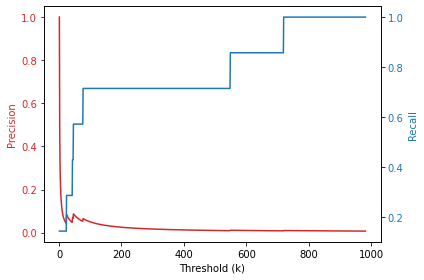

Graph for document 1


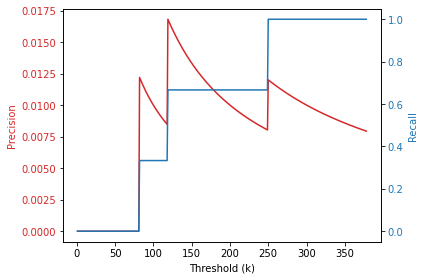

Graph for document 2


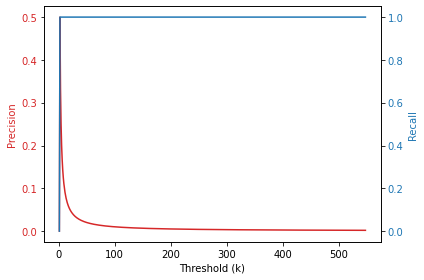

Graph for document 3


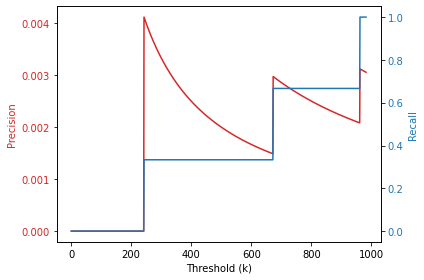

Graph for document 4


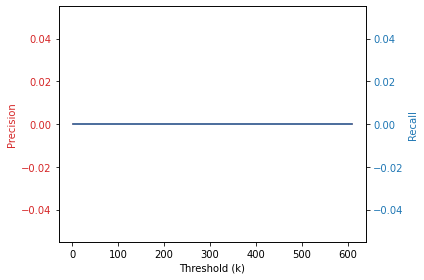

Graph for document 5


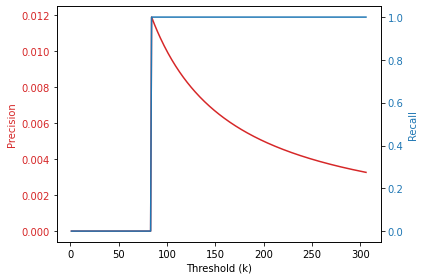

Graph for document 6


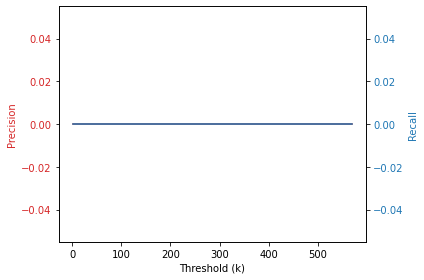

Graph for document 7


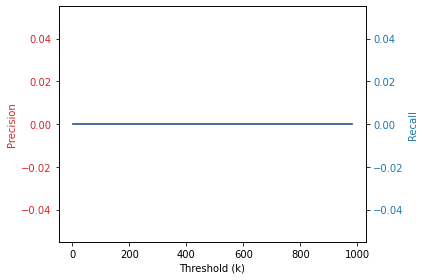

Graph for document 8


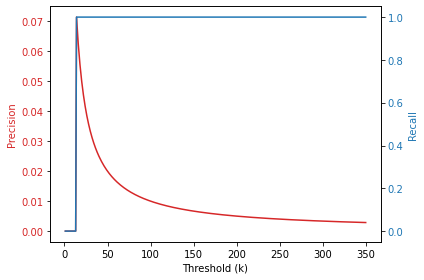

Graph for document 9


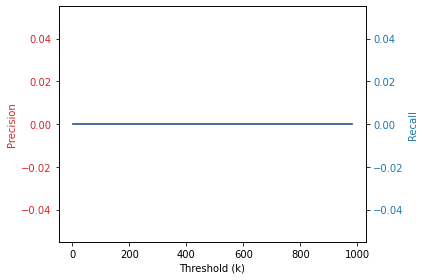

Graph for document 10


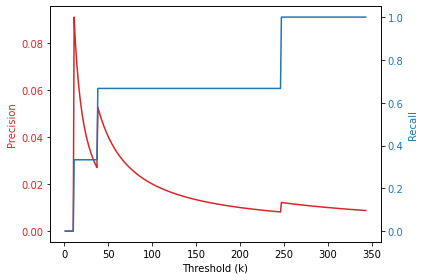

Graph for document 11


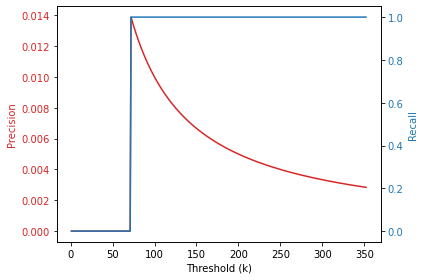

Graph for document 12


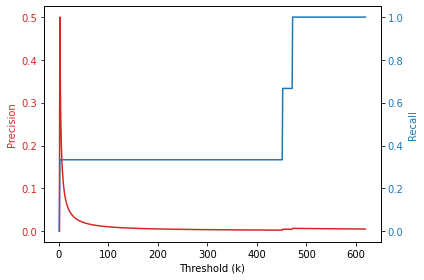

Graph for document 13


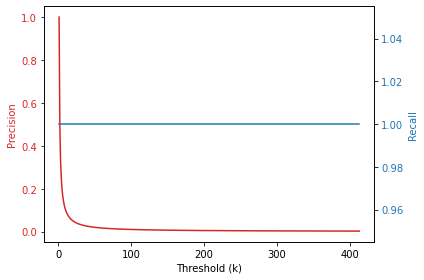

Graph for document 14


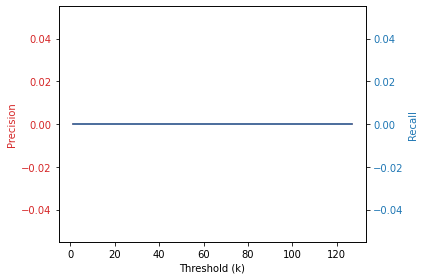

Graph for document 15


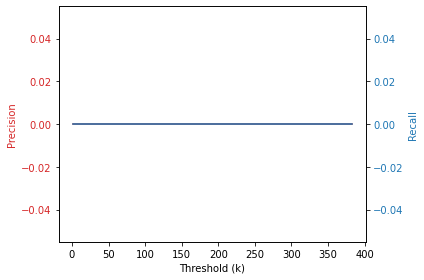

Graph for document 16


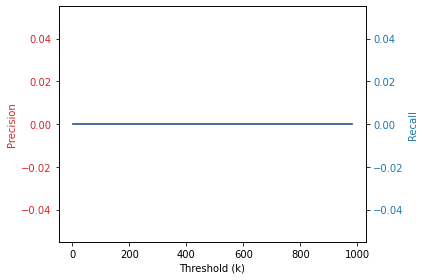

Graph for document 17


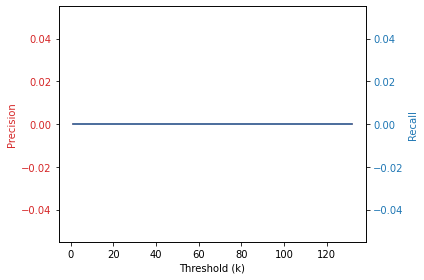

Graph for document 18


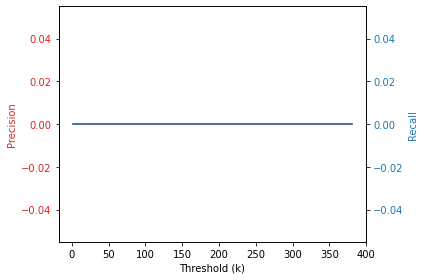

In [42]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [43]:
check_new = [elem for elem in keyword_list[13]]
check_new

['Promotion',
 'folgenden',
 'begonnen',
 'Ausland',
 'wissenschaftlichen',
 'Partner',
 'Weiterbildung',
 'Abschluss',
 'beendet',
 'beruflichen',
 'Tätigkeit',
 'absolviert',
 'Publikationen',
 'Partnerin',
 'Form',
 'genannte',
 'berufliche',
 'Hochschule',
 'wissenschaftlicher',
 'Erwerbstätigkeit',
 'Professur',
 'erworben',
 'beschäftigt',
 'Deutschland',
 'letzten',
 'Gründe',
 'Lehrveranstaltungen',
 'Fachzeitschriften',
 'Studium',
 'Aufgaben',
 'Stelle',
 'Wissenschaft',
 'wichtigsten',
 'Verfahren',
 'Forschungs',
 'Aktivitäten',
 'Betrieb',
 'privaten',
 'Promovierte',
 'aktuelle',
 'aktuellen',
 'Zukunft',
 'Auslandsaufenthalt',
 'veröffentlicht',
 'Qualifikation',
 'Marken',
 'Publikation',
 'geboren',
 'ggf.',
 'Anträgen',
 'Antragssteller',
 'Studienabschluss',
 'erhalten',
 'Gutachter',
 'Referendariat',
 'Oberrätin',
 'fachlichen',
 'Hochschulen',
 'eingetragene',
 'Urlaub',
 'Dienst',
 'innovative',
 'Mitarbeiter',
 'pädagogische',
 'theologische',
 'Wissenschaftlich

In [44]:
lowercase_check_new = []
for i in range(len(check_new)):
    lowercase_check_new.append(check_new[i].lower()) 

In [45]:
lowercase_check_new[0]

'promotion'

In [46]:
list(set(lowercase_check_new).intersection(only_keywords[13]))

['promotion']

In [47]:
only_keywords[3]

['evaluation', 'qualifikation', 'studiensituation']

In [48]:
lowercase_check_new.index('qualifikation')

44

In [49]:
best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i])))

In [50]:
best_recall_indices

[719, 249, 1, 961, 0, 83, 0, 0, 13, 0, 246, 71, 471, 0, 0, 0, 0, 0, 0]

In [51]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [52]:
best_recall_indices_element

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]